In [24]:
from sklearn.cluster import AffinityPropagation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import datetime
import os
import cProfile
import re
import time
import psutil
from sklearn import metrics
from scipy.spatial import distance
import ctypes  
from mpl_toolkits.mplot3d import Axes3D


In [25]:
df_dat = pd.read_csv('TrainingDataDSAP2Copy.csv',header=None)

In [26]:
df_dat

,0,1,2,3,4,5,6,7,8,9,...,513,514,515,516,517,518,519,520,521,522
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7526.499313,4864893.094,3
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7526.499313,4864893.094,3
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7512.540187,4864885.308,3
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7520.675900,4864892.411,3
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7520.675900,4864892.411,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19856,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7458.264200,4864852.084,2
19857,100,100,100,100,100,100,100,100,100,100,...,100,100,-80,-72,100,100,100,-7363.159000,4864768.472,1
19858,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,-7458.264200,4864852.084,2
19859,100,100,100,100,100,100,100,100,100,100,...,100,100,-81,-73,100,100,100,-7363.159000,4864768.472,1


In [27]:
#filter the data for the first 200 and just RSSIs
X = df_dat.to_numpy()
#X = X[range(0,10000,5),0:520]
X = X[0:200,0:520]
df = df_dat.to_numpy() 

In [28]:
X

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [29]:
# for the first batch of data- 200, we need to calculate the AP to find initial clusters
af = AffinityPropagation(preference=-4, damping=.56, max_iter= 100 ).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
my_centers = af.cluster_centers_
n_clusters_ = len(cluster_centers_indices)

C:\Users\neshragh\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


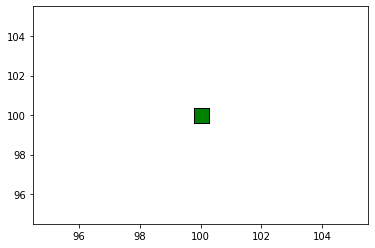

In [17]:
#witht the 520 dimentions, how can I plot????
plt.close('all')
plt.figure(1)
plt.clf()
# =============================================================================
#plt.scatter(X[:,0],X[:,1], color='c',alpha=0.3,  linewidth=4)
# =============================================================================
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '+', markersize=8)
    plt.plot(cluster_center[0], cluster_center[1], 's', markerfacecolor=col,
             markeredgecolor='k', markersize=15)
    F=X[class_members, 0]

In [30]:
# the calculating the new data points come from data stream(from point 200+1 until 300) and compare with the prevous clusters
#centers. if less than a threshold(a number =1), trow it out, otherwise put it in the list, update the mode
outs = 0
outpoint = []
for i in range(200,300):
#        print('new point',features[i,:])
        ed = [0]*n_clusters_   
       
        for kk in range(n_clusters_):            
#            class_members = labels == kk
#            cluster_center = X[cluster_centers_indices[kk]]
#            print('cluster cent',cluster_center)
#            print(str(i)+ ' '+ str(kk)+ ' '+ str(n_clusters_))
            ed[kk] = distance.euclidean(my_centers[kk,:],df[i,0:520])
#            print(ed[k])
            
        if min(ed) >60.0:
            outs = outs +1
            outpoint.append(df[i,0:520])
            
        if outs == 100:   
            Y=np.array(outpoint)
#            cluster_center = X[cluster_centers_indices]

            Y = np.concatenate((Y,my_centers))
#        else:
#            Y= np.array(cluster_center)

In [31]:
#apply AP when the size of list is full
###############################
#            plt.clf()
            #plt.scatter(Y[:, 0], Y[:, 1], color='m', alpha=0.1, linewidth=2)
#            Y= outpoint[0:100,:]
            f = AffinityPropagation(preference=-4, damping=.88, max_iter= 100 ).fit(Y)
#            cluster_centers_indice = f.cluster_centers_indices_
            my_centers = f.cluster_centers_
            label = f.labels_
            n_clusters_ = np.size(my_centers, 0)
#            n_clus_ = len(cluster_centers_indice)
#            for p, pol in zip(range(n_clus_), colors):
#                class_member = label == p
#                cluster_cente = Y[cluster_centers_indice[p]]
##                plt.plot(Y[class_member, 0], Y[class_member, 1], pol + '+', markersize=8)                
#                plt.plot(cluster_cente[0], cluster_cente[1], 'h', markerfacecolor=pol,
##                         markeredgecolor='k', markersize=15)                
#                F= Y[class_member, 0]
#            plt.show()
            outs = 0
            ### Macro Cluster after AP restart

C:\Users\neshragh\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


In [22]:
#print('Exemplars:',X[cluster_centers_indices])
#print('Outliers',Y[cluster_centers_indice])            

#concat two arrays of outliers and examplar to generate macro clusters
#eX= X[cluster_centers_indices]
#eY= Y[cluster_centers_indice]
#macro = np.concatenate((eX,eY), axis=0)


af_mac = AffinityPropagation(preference=-1, damping=.55, max_iter= 100 ).fit(my_centers)
cluster_centers_indices_mac = af_mac.cluster_centers_indices_
#labels_mac = af_mac.labels_
my_label = af_mac.predict(df[:,0:520])
#n_clustersmac_ = len(cluster_centers_indices_mac)
#for m, colm in zip(range(n_clustersmac_), colors):
#    class_members_mac = labels_mac == m
#    cluster_center_mac = macro[cluster_centers_indices_mac[m]]
#    plt.plot(macro[class_members_mac, 0], macro[class_members_mac, 1], col + '+', markersize=8)
#    plt.plot(cluster_center_mac[0], cluster_center_mac[1], 'P', markerfacecolor=col,
#             markeredgecolor='k', markersize=15)
#    F=macro[class_members_mac, 0]

C:\Users\neshragh\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


Estimated number of clusters: 106


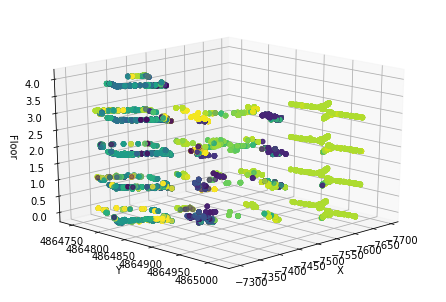

In [32]:
#plot the floor, lat,long with the lables(clusters.each color shows one clusetrs)  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
    
ax.view_init(elev=20., azim=45)
    

ax.scatter(df[:,520], df[:,521], df[:,522], c=my_label, marker="o", picker=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Floor')

n_cluster_ = len(cluster_centers_indices_mac)

print('Estimated number of clusters: %d' % n_cluster_)

    
    
    